# Введение в искусственные нейронные сети
# Урок 1. Основы обучения нейронных сетей

## Небольшой пример по обучению простой нейронной сети


Рассмотрим создание простой нейронной сети. Данная нейронная сеть будет обучаться предсказывать 4 число на основании первых трех. Для этого мы ей передадим обучающую набор данных из трех последовательностей чисел. В каждой последовательности чисел будет три первых числа в качетсве входных данных и 4 число которое следуюет за этими данными.
После обучения нейронной сети мы просим пользователя ввести 3 числа и программа выдаст 4 число в качестве предсказания.

В данном примере будут использоваться следующие обучающие последовательсноти:

Данные 1|    0	    0	1	 0

Данные 2|    1	    1	1	 1

Данные 3|    1	    0	1	 1

Данные 4|    0	    1	1	 0


Здесь можно заметить, что четвертое число всегда соотвествует первому. Эту закономерность и должна благодаря коду ниже научиться обнаруживать нейронная сеть, а затем на произвольных данных введенных пользователем выдать правильное предсказание.
Этот пример позволяет создать и запустить простейшую нейронную сеть, но уже  в этом примере присутсвуют все необходимые атрибуты создания нейронных сетей: подготовка данных для обучения модели, конфигурация модели, запуск модели.
Дальше мы разберем, что такое функция активации, обратное распространение, внутренние слои нейронной сети и прочие аспекты создания нейронных сетей.
Обратите внимание, что здесь используется библиотека numpy для получения дополнительных команд при работе с массивами. Более подробно данную библиотеку мы рассмотрим позже.

In [ ]:
'''
Исходный код к уроку 1.
Пример простой нейронной сети на numpy
'''

import numpy as np

# генерации случайных чисел для инициализации весов
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1


# вычисление сигмоид функции
def sigmoid(x):
     return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigm_deriv(x):
        return x * (1 - x)

# тренировка нейронной сети
def train_nn(training_inputs, training_outputs, training_iterations):
    global synaptic_weights
    for iteration in range(training_iterations):
        # перекачивание данных через нейрон
        output = run_nn(training_inputs)

        # вычисление ошибки через обратное распространение back-propagation
        error = training_outputs - output
            
        # выполнение корректировки весов
        adjustments = np.dot(training_inputs.T, error * sigm_deriv(output))

        synaptic_weights += adjustments


# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global synaptic_weights
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, synaptic_weights))
    return output

# создание данных для обучения
training_inputs = np.array([[0,0,1], [1,1,1], [1,0,1], [0,1,1]])
training_outputs = np.array([[0,1,1,0]]).T

# запуск тренировки нейронной сети 
train_nn(training_inputs, training_outputs, 15000)
print("веса после завершения обучения: ")
print(synaptic_weights)

# получение трех чисел от пользователя
user_inp1 = str(input("Первое число(0 или 1): "))
user_inp2 = str(input("Второе число(0 или 1): "))
user_inp3 = str(input("Третье число(0 или 1): "))

print("Проверка на новых данных: {user_inp1} {user_inp2} {user_inp3}")
print("Предсказание нейронной сети: ")
print(run_nn(np.array([user_inp1, user_inp2, user_inp3])))


## Пример построения  двухслойной нейронной сети на numpy

In [46]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
# g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)

# pd 1.0
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)

# pd 1.0
#y = y.as_matrix()
y = y.values

y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
   
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w_0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w_1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# # массив для ошибок, чтобы потом построить график
# errors = []

# # процесс обучения
# for i in range(200000):

#     # прямое распространение(feed forward)
#     layer0 = X_train
#     layer1 = sigmoid(np.dot(layer0, w0))
#     layer2 = sigmoid(np.dot(layer1, w1))

#     # обратное распространение(back propagation) с использованием градиентного спуска
#     layer2_error = y_train - layer2
#     layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
#     layer1_error = layer2_delta.dot(w1.T)
#     layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
#     w1 += layer1.T.dot(layer2_delta) * n
#     w0 += layer0.T.dot(layer1_delta) * n
    
#     error = np.mean(np.abs(layer2_error))
#     errors.append(error)
#     accuracy = (1 - error) * 100




In [47]:
# процесс обучения
def teach_nn(X_train, y_train, w0, w1, n, epoch):
    errors = []
    for i in range(epoch):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
        
    return accuracy, errors



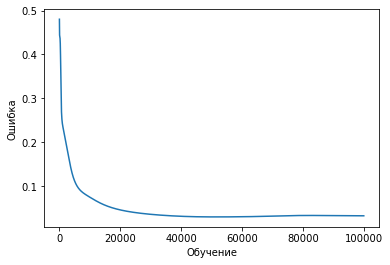

Точность нейронной сети 96.72% при шаге: 0.01 и кол-ве эпох: 100000


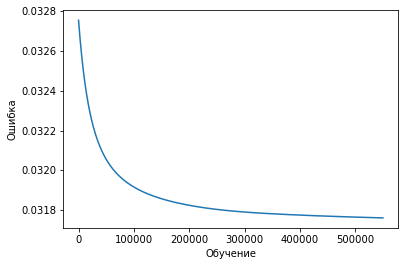

Точность нейронной сети 96.82% при шаге: 0.01 и кол-ве эпох: 550000


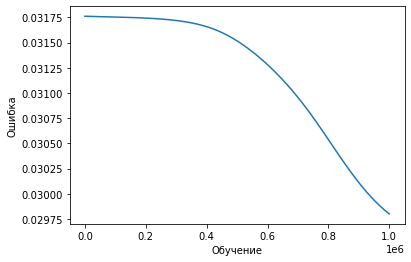

Точность нейронной сети 97.02% при шаге: 0.01 и кол-ве эпох: 1000000


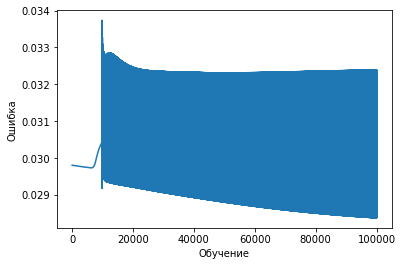

Точность нейронной сети 96.76% при шаге: 0.05500000000000001 и кол-ве эпох: 100000


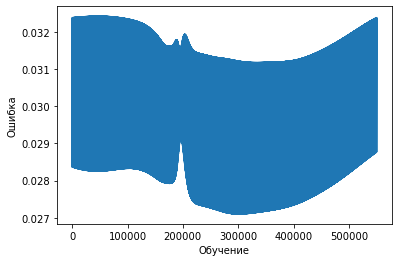

Точность нейронной сети 96.76% при шаге: 0.05500000000000001 и кол-ве эпох: 550000


d:\_ds_\_env_\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp


In [ ]:
### Шаг 4. Демонстрация полученных результатов
for n in np.linspace(0.01, 0.1, 3):
    for epoch in range(100000, 1100000, 450000):
        w0 = w_0
        w1 = w_1
        accuracy, errors = teach_nn(X_train, y_train, w0, w1, n, epoch)

        # черчение диаграммы точности в зависимости от обучения
        plt.plot(errors)
        plt.xlabel('Обучение')
        plt.ylabel('Ошибка')
        plt.show() # расскоментируйте, чтобы посмотреть 

        #print("Точность нейронной сети " + str(round(accuracy,2)) + "%")
        print(f'Точность нейронной сети {round(accuracy,2):.2f}% при шаге: {n} и кол-ве эпох: {epoch}')

В этом уроке мы с вами рассматривали как сделать простые нейронные сети без использования специальных фреймворков и библиотек для этого. В следующих уроках мы с вами познакомимся как делать нейронные сети с помощью Keras и TensorFlow.

## Практическое задание

<ol>
    <li>Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?</li>
</ol>

Мы разобрались с основами обучения нейронных сетей и получили некоторое представление об архитектурах простых нейронных сетей. Давайте попробуем закрепить эти знания на практике. Кроме того на примере который будет изложен ниже возможно проясняться какие-либо оставшиеся вопросы.

В данном примере мы сделаем нейронную сеть которая будет отличать различные виды ириса между собой. Надо полагать данный датасет вам уже знаком. Логика работы этого кода будет такой же как и в первом разобранном примере, но только все компоненты этого кода будут несколько усложнены.

## Выводы:

<ol>
    <li>На качество влияют два гиперпараметра: шаг обучения и кол-во эпох </li>
    <li>При уменьшении шага обучение проходит более гладко и точность повышается, но требует больше эпох и соответственно времени </li>
    <li>При увеличении кол-ва эпох увеличивается точность, но до определенного предела, после которого обучение дальше не имеет смысла </li>
    <li><b>Следовательно нужно искать баланс между шагом, эпохами, точностью и временем )) <b></li>
    
</ol>